In [34]:
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [35]:
import pandas as pd
import os
import numpy as np

# file_dir = os.getcwd()
# raw_data_dir = os.path.join(file_dir, '/raw_data')
file_list = []

for root, dirs, files in os.walk('./raw_data'):
    for file in files:
        if os.path.splitext(file)[1] == '.csv':
        # 排除掉readme.md等非csv文件
            file_list.append(file)

# print(file_list)  

df = pd.DataFrame()

for index, csv in enumerate(file_list):
    
    df_temp = pd.read_csv('./raw_data/'+csv)
    if int(csv[-5]) == 0:
        file_list[index] = csv[:-5] + '1' +csv[-4:]
        print('changed csv: ', csv)
    target_column = pd.DataFrame(np.array([int(file_list[index][-5])]*df_temp.shape[0]))
    # 构造target列，注意要使用二维的array [[1],[1]]这样是列 [[1,1]]这样是行
    df_temp = pd.concat([df_temp, target_column], axis=1, ignore_index=True)
    # 连接样本和target列
    df = pd.concat([df, df_temp], ignore_index=True)
    # 连接所有样本
    
print(file_list)

changed csv:  data_20190303_1035_0.csv
['data_20190301_1035_2.csv', 'data_20190303_1035_1.csv', 'data_20190309_1008_3.csv', 'data_20190309_1334_3.csv', 'data_20190309_1336_3.csv', 'data_20190309_1342_2.csv', 'data_20190309_1358_2.csv', 'data_20190309_1405_2.csv', 'data_20190309_1409_1.csv', 'data_20190309_1411_1.csv', 'data_20190309_1413_1.csv']


In [36]:
pd.set_option('display.max_rows', 10)
print(df)

          0         1         2         3         4         5         6    \
0    22.62949  23.34601  22.84607  24.27225  24.22751  24.99457  27.39221   
1    23.16067  23.59763  25.04761  24.74619  27.40509  27.20163  28.14008   
2    23.03558  24.24997  23.59360  24.87021  25.99951  27.53504  27.61453   
3    22.25803  23.60641  22.50025  24.63440  23.02280  26.32965  24.39380   
4    22.11905  23.36346  22.37064  22.95017  22.00073  22.74686  22.73328   
..        ...       ...       ...       ...       ...       ...       ...   
759  25.18289  25.38110  25.18024  25.48029  25.63098  25.73325  24.86350   
760  25.06046  25.24048  25.53430  24.99799  25.09933  24.95724  25.81555   
761  24.67053  24.99020  25.28839  25.46359  25.40866  24.84756  24.85449   
762  25.29895  25.60233  25.40549  25.22012  24.87308  25.38123  25.17206   
763  25.17365  25.10172  24.81860  25.33408  24.65823  24.94394  25.27774   

          7         8         9   ...        759       760       761  \
0  

In [37]:
target_column = df.iloc[:, -1]
df = df.iloc[:, :-1]

# 让脸部温度单独保存，环境温度设计为统一值
ta = df.min(axis=1)

df_face = pd.DataFrame()
# df_face 脸部温度+其他区域温度置换为环境温度
df_onlyface = pd.DataFrame()
# df_onlyface 只有脸部温度点

for i, minTa in zip(df.values, ta):
    face = []
    onlyface = []
    for j in i:
        try:
        # 因为检查到有一些数字不是float是str，像21.42346.1，不知是什么原因导致的，
            if j - minTa > 7:
                face.append(j)
#                 onlyface.append(j)
            else:
                face.append(minTa)
                ave_ta ....
        except:
            j = float(j[:6])
            if j - minTa > 7:
                face.append(j)
#                 onlyface.append(j)
            else:
                face.append(minTa)
    face_todf = pd.DataFrame(face).T
#     onlyface_todf = pd.DataFrame(onlyface).T
    df_face = pd.concat([df_face, face_todf], axis = 0, ignore_index=True)
#     df_onlyface = pd.concat([df_onlyface, onlyface_todf], axis = 0, ignore_index=True)

In [38]:
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=40, contamination=0.05)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(df_face)
# n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

In [39]:
min_index = np.argpartition(X_scores, int(df_face.shape[0]*0.05))[:int(df_face.shape[0]*0.05)]

# 去除掉5%的异常样本
df = df.drop(min_index)

In [40]:
df

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,22.62949,23.34601,22.84607,24.27225,24.22751,24.99457,27.39221,26.94012,27.34689,27.80975,...,30.87418,25.27432,22.86929,22.75967,22.38684,22.88013,22.94119,22.99555,22.63037,23.33066
1,23.16067,23.59763,25.04761,24.74619,27.40509,27.20163,28.14008,27.87192,28.14847,27.80102,...,24.98102,23.29489,22.53711,22.20065,22.37799,22.64114,21.91843,22.99634,23.05240,22.60111
2,23.03558,24.24997,23.59360,24.87021,25.99951,27.53504,27.61453,28.60287,27.45639,27.70782,...,23.74487,22.45697,21.56348,22.20950,22.61514,22.40997,22.42819,22.61395,23.05298,23.48731
3,22.25803,23.60641,22.50025,24.63440,23.02280,26.32965,24.39380,27.77655,26.36633,27.61267,...,23.43933,23.10901,21.89667,22.56369,22.38712,22.90918,22.18204,22.10751,22.77466,23.50760
4,22.11905,23.36346,22.37064,22.95017,22.00073,22.74686,22.73328,22.88919,22.98193,23.40122,...,27.24207,23.62778,22.02560,21.54199,22.05508,22.78049,21.82272,22.62360,22.51157,23.20691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,25.19186,25.50617,24.60077,25.48099,25.42655,25.19168,24.97824,25.31781,25.55066,25.57181,...,26.26749,25.68002,23.67194,23.71930,23.63513,24.54666,23.53793,24.08908,24.59927,24.73135
758,25.20230,25.74103,25.43356,25.23453,25.43646,25.61295,25.19971,25.40863,25.65897,25.95016,...,25.95581,25.19009,23.75998,23.94724,23.84430,24.44476,24.00742,24.72870,24.16724,24.74560
759,25.18289,25.38110,25.18024,25.48029,25.63098,25.73325,24.86350,25.42084,25.64047,25.47333,...,25.67252,25.27060,23.98160,24.03442,24.19855,24.76816,24.14426,24.95731,24.59708,24.86298
760,25.06046,25.24048,25.53430,24.99799,25.09933,24.95724,25.81555,25.19739,25.74136,25.16293,...,25.35944,24.87146,23.03009,24.03830,23.95770,25.79822,22.66364,25.08643,24.03143,25.14664


In [ ]:
ta = ta.iloc[df.index]

In [44]:
ta.index = np.arange(ta.shape[0])

In [45]:
for i, minTa in zip(df.values, ta):
#     face = []
    onlyface = []
    for j in i:
        try:
        # 因为检查到有一些数字不是float是str，像21.42346.1，不知是什么原因导致的，
            if j - minTa > 7:
#                 face.append(j)
                onlyface.append(j)
#             else:
#                 face.append(minTa)
        except:
            j = float(j[:6])
            if j - minTa > 7:
#                 face.append(j)
                onlyface.append(j)
#             else:
#                 face.append(minTa)
#     face_todf = pd.DataFrame(face).T
    onlyface_todf = pd.DataFrame(onlyface).T
#     df_face = pd.concat([df_face, face_todf], axis = 0, ignore_index=True)
    df_onlyface = pd.concat([df_onlyface, onlyface_todf], axis = 0, ignore_index=True)

In [46]:
skewness = pd.DataFrame(df_onlyface.skew(axis=1))
maxTemp = pd.DataFrame(df_onlyface.max(axis=1))
minTemp = pd.DataFrame(df_onlyface.min(axis=1))
meanTemp = pd.DataFrame(df_onlyface.mean(axis=1))

In [47]:
# 指定划分bin的点
bins = [28.3, 28.6, 28.9, 29.2, 29.5,
 29.8, 30.1, 30.4, 30.7, 31.0,  31.3,
 31.6, 31.9, 32.2, 32.5,  32.8, 33.1,
 33.4, 33.7, 34.0,  34.3, 34.6, 34.9,
 35.2, 35.5, 35.8, 36.1, 36.4, 36.7]

highest_bin_list = []
for i in df_onlyface.values:
    i = [j for j in i if not np.isnan(j)]
    N, _ = np.histogram(np.clip(i,28.3,36.7), bins=bins)
    highest_bin = (bins[N.argmax()]+bins[N.argmax()+1])/2
    # 返回各区域频数N
    highest_bin_list.append(highest_bin)

modeTemp = pd.DataFrame(highest_bin_list, index=df_onlyface.index)

In [48]:
features = pd.concat([skewness, maxTemp, minTemp, meanTemp, modeTemp, ta], axis=1)
features.columns = ['skewness', 'maxTemp', 'minTemp', 'meanTemp', 'modeTemp', 'ta']

In [49]:
features['max_minus_min'] = features['maxTemp'] - features['minTemp']
features['mode_minus_ta'] = features['modeTemp'] - features['ta']
# features['mean_minus_ta'] = features['meanTemp'] - features['ta']
# features['max_minus_ta'] = features['maxTemp'] - features['ta']
features['min_minus_ta'] = features['minTemp'] - features['ta']
# features['mode_minus_min'] = features['modeTemp'] - features['minTemp']
# features['mean_minus_min'] = features['meanTemp'] - features['minTemp']
# features['max_minus_mean'] = features['maxTemp'] - features['meanTemp']
# features['mode_squa'] = features['modeTemp'] ** 2
# features['mean_squa'] = features['meanTemp'] ** 2
# features['max_squa'] = features['maxTemp'] ** 2
# features['mode_cub'] = features['modeTemp'] ** 3
# features['mean_cub'] = features['meanTemp'] ** 3
# features['max_cub'] = features['maxTemp'] ** 3
features = features.drop(["minTemp"], axis=1)

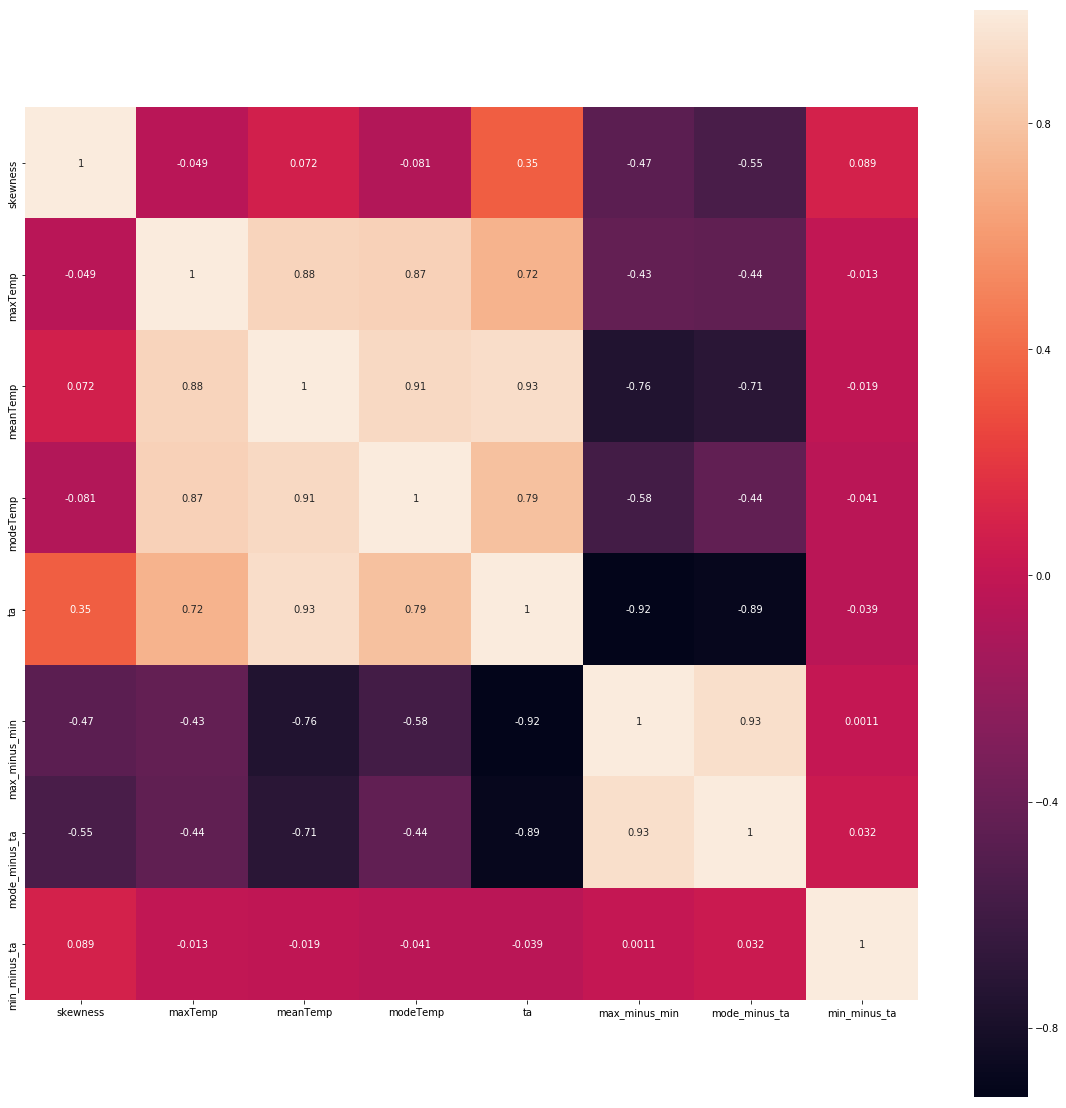

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

featuresCorr = features.corr('spearman')
fig = plt.figure(figsize=(20, 20))
# plt.subplots((1,1,1)) # 设置画面大小
sns.heatmap(featuresCorr, annot=True, vmax=1, square=True)
plt.show()

In [51]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
features_scaler = std.fit_transform(features)

In [52]:
target_column = target_column.iloc[df.index]

In [53]:
features_scaler.shape

(726, 8)

In [54]:
target_column.shape

(726,)

In [55]:
from sklearn.model_selection import train_test_split

train = features_scaler
target = target_column.values

train_X,test_X, train_y, test_y = train_test_split(train,
                                                   target,
                                                   test_size = 0.1,
                                                   random_state = 0)

In [59]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf = clf.fit(train_X, train_y)
print(clf.feature_importances_ )

model = SelectFromModel(clf, prefit=True)
print(features.columns[model.get_support(indices=True)])
# print(model.get_support(indices=True))
X_new = model.transform(train_X)

[0.1647388  0.08745432 0.16251091 0.07479519 0.1882895  0.18536004
 0.10174216 0.03510908]
Index(['skewness', 'meanTemp', 'ta', 'max_minus_min'], dtype='object')


E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [60]:
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier

gpc = GaussianProcessClassifier(1.0 * RBF(1.0), max_iter_predict=500, n_restarts_optimizer=5, warm_start=True, random_state=1, multi_class='one_vs_rest', n_jobs=-1)
gpc.fit(X_new, train_y)

GaussianProcessClassifier(copy_X_train=True,
             kernel=1**2 * RBF(length_scale=1), max_iter_predict=500,
             multi_class='one_vs_rest', n_jobs=-1, n_restarts_optimizer=5,
             optimizer='fmin_l_bfgs_b', random_state=1, warm_start=True)

In [63]:
test_X_com = np.concatenate((test_X[:, 0].reshape(-1,1), test_X[:, 2].reshape(-1,1), test_X[:, 4:6]), axis=1)

gpc_score = round(gpc.score(test_X_com, test_y) * 100, 2)
print(gpc_score)

from sklearn.model_selection import cross_val_score
cross_val_score(gpc, test_X_com, test_y)

98.63


E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.88461538, 0.875     , 0.95652174])

In [20]:
gpc.log_marginal_likelihood()

-123.73796363139941

In [62]:
gpc_notrain = GaussianProcessClassifier(1.0 * RBF(1.0))
gpc_notrain.predict(X_new, return_std=True)

TypeError: predict() got an unexpected keyword argument 'return_std'